Relatório do trabalho
==============
**Nome:** Álvaro Leandro Cavalcante Carneiro
**Linguagem utilizada:** Python 3.6

Os códigos e o relatório foram desenvolvidos em um Jupyter notebook.

# Qual o problema?
Utilizar o algoritmo PSO para otimização de uma função matemática.

## Importação das bibliotecas
Importação das bibliotecas que foram utilizadas em todo o processo de desenvolvimento.

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

## Função de aptidão
A função de aptidão será a responsável por fazer a avaliação da solução proposta pelo algoritmo e que deve nortear a convergência do mesmo, para maximização ou minimização do valor retornado. 

A implementação nesse caso é basicamente a fórmula matemática que se tem interesse em otimizar, sendo por objetivo minimizar o valor.

In [3]:
def funcao_aptidao(x, y):
    return (1 - x)**2 + 100*(y-x**2)**2

## Enxame de indivíduos
Foi criado o método de *get_enxame* que tem por objetivo criar o enxame inicial de partículas. Cada partícula é um valor aleatório dentro do domínio do problema, e em cada iteração do método um valor diferente é atribuido para cada dimensão. 

In [4]:
def get_enxame(n_particulas, dominio):
    enxame = []

    for i in range(n_particulas):
        particula = [random.uniform(dominio[i][0], dominio[i][1]) for i in range(len(dominio))]
        enxame.append(particula)
    
    return enxame

## Velocidade inicial das partículas
Cada partícula começa com uma velocidade inicial aleatória, portanto foi criado o método *get_velocidade* que vai criar um valor de velocidade para cada partícula baseado no domínio mínimo e máximo permitidos.

In [5]:
def get_velocidade(n_particulas, dominio):
    velocidade = []
    for i in range(n_particulas):
        velocidade.append(random.uniform(dominio[0], dominio[len(dominio) - 1]))
    
    return velocidade

## Atualização da velocidade
O método atualizar a velocidada é o responsável por aplicar a fórmula que faz a atualização da velocidade das partículas no espaço.

In [6]:
def atualizar_velocidade(v_atual, p_atual, melhor_p_particula, aptidao, 
                         dominio_v, dominio_particulas, ac1 = 2.05, ac2 = 2.05):
      
    v_nova = []
    count = 0

    for velocidade in v_atual:
        # criação do array de valores aleatórios, de 0 até o valor de ac para cada dimensão.
        v_aleatorio1 = [random.uniform(0, ac1) for i in range(len(dominio_particulas))]
        v_aleatorio2 = [random.uniform(0, ac2) for i in range(len(dominio_particulas))]
        
        # encontrando qual o melhor vizinho
        proximo_vizinho = count + 1 if count + 1 < len(aptidao) else 0
        melhor_p_vizinho = aptidao.index(min([aptidao[count - 1]] + [aptidao[proximo_vizinho]]))
        
        # pegando a melhor posição do melhor vizinho
        melhor_p_vizinho = melhor_p_particula[melhor_p_vizinho]

        # cálculo da inteligência cognitiva da partícula
        inteligencia_cognitiva = velocidade + (np.dot(v_aleatorio1, np.array(melhor_p_particula[count]) - np.array(p_atual[count]))) 
        # cálculo da inteligência social da partícula
        inteligencia_social = np.dot(v_aleatorio2, np.array(melhor_p_vizinho) - np.array(p_atual[count]))
        # atualização da velocidade (soma das duas inteligências)
        velocidade_atualizada = inteligencia_cognitiva + inteligencia_social

        # verifica se a nova velocidade está dentro de domínio e corrige o valor se necessário
        velocidade_atualizada = velocidade_atualizada if velocidade_atualizada <= dominio_v[1] else dominio_v[1]
        velocidade_atualizada = velocidade_atualizada if velocidade_atualizada >= dominio_v[0] else dominio_v[0]
     
        # adiciona o valor novo em uma lista que será retornada
        v_nova.append(velocidade_atualizada)
        
        count += 1 
    
    return v_nova

## Atualização de posição
A atualização da posição atual da partícula foi implementada no método *atualizar_posicao*, onde basicamente é calculado a posição atual do ponto somado à sua velocidade de movimento obtida no método anterior. É necessário antes apenas adicionar uma dimensão duplicada na velocidade com o método *stack*, para aplicar a somatória em todas as dimensões.

In [7]:
def atualizar_posicao(p_atual, velocidade):
    velocidade = np.stack((np.array(velocidade), np.array(velocidade)), axis=1) 
    nova_p = np.array(p_atual) + np.array(velocidade)
    
    return nova_p

Foi criado um método chamado *get_melhor_posicao* responsável por calcular a nova aptidão das posições que foram atualizadas e também verificar as melhores aptidões e melhores posições de cada partícula no enxame, isso é utilizado posteriormente no cálculo de velocidade.

In [8]:
def get_melhor_posicao(enxame_anterior, enxame, aptidao_anterior):
    nova_aptidao = [funcao_aptidao(x, y) for x, y in enxame] # aptidão com as novas posições

    count = 0
    melhor_posicao = []
    melhor_aptidao = []

    for i in aptidao_anterior:
        # verifica se alguma das posições novas é melhor e substitui se for o caso
        melhor_posicao.append(enxame[count] if nova_aptidao[count] < aptidao_anterior[count] else enxame_anterior[count])
        # verifica se alguma das aptidões melhorou e substitui se for o caso
        melhor_aptidao.append(nova_aptidao[count] if nova_aptidao[count] < aptidao_anterior[count] else aptidao_anterior[count])
        count +=1
    
    return melhor_posicao, nova_aptidao, melhor_aptidao

## Convergência do algoritmo
Foram criados dois métodos para exibir os resultados em termos de convergência do algoritmo. Primeiro o *exibir_convergencia_total* que é responsável por mostrar a convergência de cada uma das partículas do enxame ao longo das iterações.

In [9]:
def exibir_convergencia_total(convergencia):
    matriz_convergencia = np.asmatrix(convergencia)
    matriz_convergencia = np.transpose(matriz_convergencia) 
    
    for i in matriz_convergencia:
        vetor = i.reshape(-1, 1)
        plt.plot(vetor)
    
    plt.show()

O segundo método foi o de *exibir_convergencvia_minima_media*, que como o próprio nome já sugere, mostra os gráficos da média e também do valor mínimo (por se tratar de um problema onde o objetivo é minimizar) das partículas do enxame.

In [10]:
def exibir_convergencia_minima_media(melhores_aptidoes, aptidao_media):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8)) # iniciar a figura
    # plotar a figura de treinamento
    axes[0].plot(melhores_aptidoes, color = 'blue')
    axes[0].legend(['Melhor aptidão ao longo das iterações'])
    # plotar a figura de teste
    axes[1].plot(aptidao_media, color = 'orange')
    axes[1].legend(['Média de aptidão ao longo das iterações'])

    plt.xlabel('Execuções')
    plt.ylabel('Aptidão')
    plt.show()

## Implementação do PSO
O método *pso* é onde o processo de otimização e busca por melhores resultados é realizado de fato, aplicando as etapas que foram implementadas anteriormente. Os parâmetros passados e que devem ser ajustados para melhorar a performance do algoritmo são o número de partículas no enxame, o domínio das partículas (fixo entre -5 e 5 nesse caso), o domínio da velocidade e o número de execuções.

In [11]:
def pso(n_particulas, dominio_particulas, dominio_velocidade, execucoes = 30):
    enxame = get_enxame(n_particulas, dominio_particulas)
    velocidade = get_velocidade(n_particulas, dominio_velocidade)

    melhor_p_particula = enxame # p indica posição
    enxame_anterior = []
    execucao = 0
    aptidoes = []
    melhores_aptidoes = []
    aptidao_media = []

    while execucao < execucoes:
        if len(enxame_anterior) == 0:
            # entra aqui na primeira vez
            aptidao = [funcao_aptidao(x, y) for x, y in enxame]
            velocidade = atualizar_velocidade(velocidade, enxame, melhor_p_particula,
                                        aptidao, dominio_velocidade, dominio_particulas)
        else:
            # as demais iterações passam por esse else
            melhor_p_particula, aptidao, melhor_aptidao = get_melhor_posicao(enxame_anterior,
                                                                             enxame, aptidao)            
            
            velocidade = atualizar_velocidade(velocidade, enxame, melhor_p_particula,
                                        melhor_aptidao, dominio_velocidade, dominio_particulas)
        
            aptidoes.append(melhor_aptidao)
            melhores_aptidoes.append(min(melhor_aptidao))
            aptidao_media.append(sum(melhores_aptidoes) / len(melhores_aptidoes))


        enxame_anterior = enxame.copy()
        enxame = atualizar_posicao(enxame, velocidade)
        
        execucao += 1
    
    # a melhor posição é calculada aqui na última iteração.
    melhor_p_particula, aptidao, melhor_aptidao = get_melhor_posicao(enxame_anterior, 
                                                                     enxame, aptidao)            

    return min(melhor_aptidao), melhor_p_particula[melhor_aptidao.index(min(melhor_aptidao))], aptidoes, \
    melhores_aptidoes, aptidao_media

## realização dos testes
O método *executar_pso* foi criado para facilitar os testes no algoritmo. Sua função é reexecutar o código por 30 vezes, para que seja possível capturar o desempenho da otimização do problema com os parâmetros escolhidos diferentes vezes, mitigando um pouco o efeito aleatório que é comum nesse tipo de tarefa de otimização.

Além disso, os melhores resultados são registrados e exibidos ao final de todas as execuções.

In [29]:
def executar_pso(n_particulas, dominio_particulas, dominio_velocidade, execucoes):
    aptidao_final = 99999
    posicao_final = []
    melhor_aptidao_final = []
    melhor_aptidao_media = []
    aptidoes_finais = []

    for i in range(30):
        melhor_aptidao, melhor_p, aptidoes, melhores_aptidoes, \
        aptidao_media = pso(n_particulas, dominio_particulas, dominio_velocidade, execucoes)

        # registrar os melhores resultados.
        aptidao_final = melhor_aptidao if melhor_aptidao <= aptidao_final else aptidao_final
        posicao_final = melhor_p if melhor_aptidao <= aptidao_final else posicao_final
        melhor_aptidao_final = melhores_aptidoes if melhor_aptidao <= aptidao_final else melhores_aptidoes
        melhor_aptidao_media = aptidao_media if melhor_aptidao <= aptidao_final else melhor_aptidao_media 
        aptidoes_finais = aptidoes if melhor_aptidao <= aptidao_final else aptidoes 

    exibir_convergencia_total(aptidoes_finais)
    exibir_convergencia_minima_media(melhor_aptidao_final, melhor_aptidao_media)
    print('Melhor aptidão', aptidao_final)
    print('Melhor posição encontrada', posicao_final)

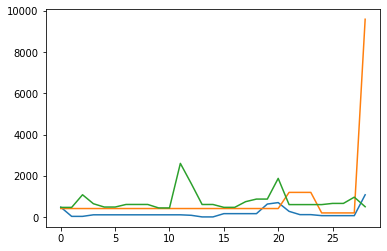

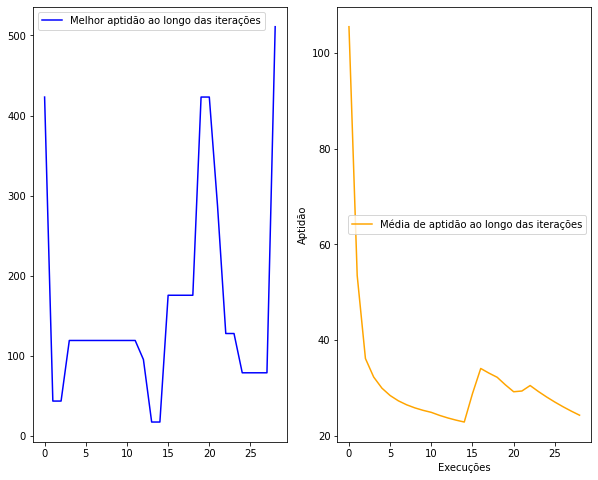

Melhor aptidão 0.35814589325174084
Melhor posição encontrada [0.8265457  0.62590132]


In [28]:
executar_pso(3, [(-5, 5), (-5, 5)], [-2, 2], 30)